# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df_boston = pd.read_csv(r'C:\Users\Denish\Desktop\AI\Labs\lab-ml-and-linear-regression\data\housing.csv', header=None, delimiter=r"\s+", names=column_names)
df_boston = pd.read_csv(r'C:\Users\Denish\Desktop\AI\Labs\lab-ml-and-linear-regression\data\housing.csv')

'''CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's'''

"CRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [3]:
df_boston.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df_boston.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

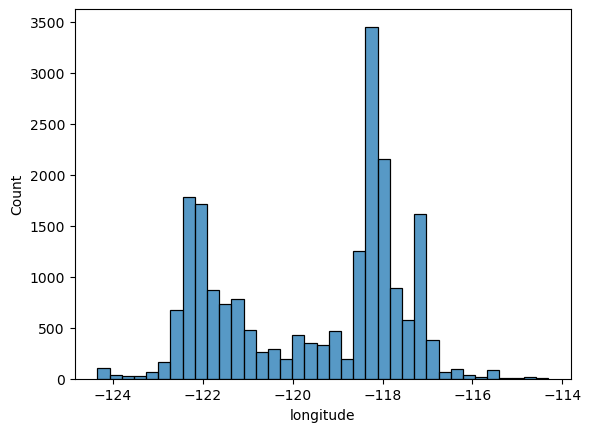

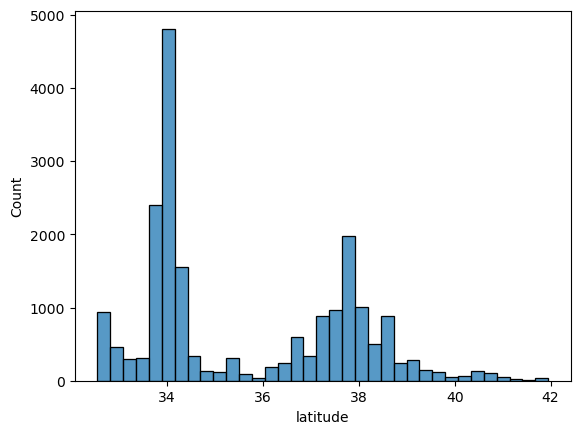

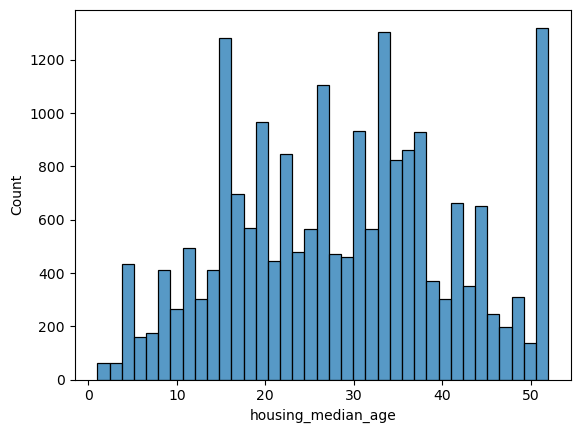

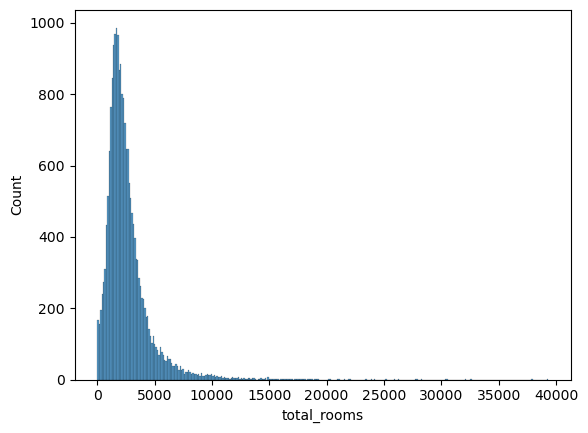

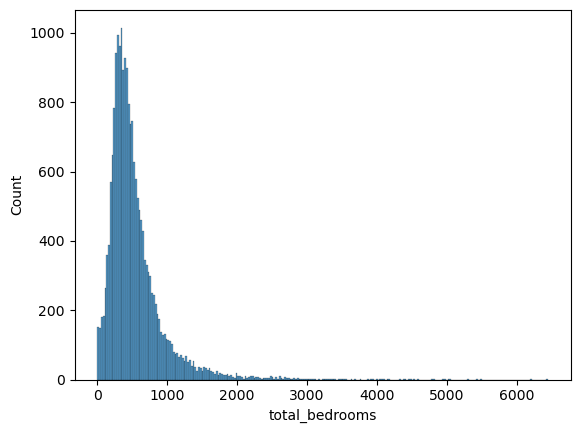

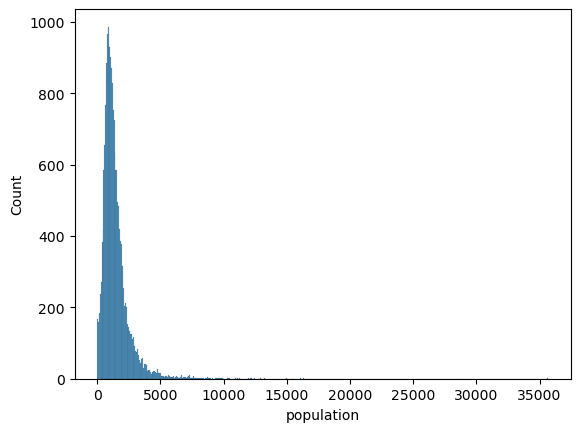

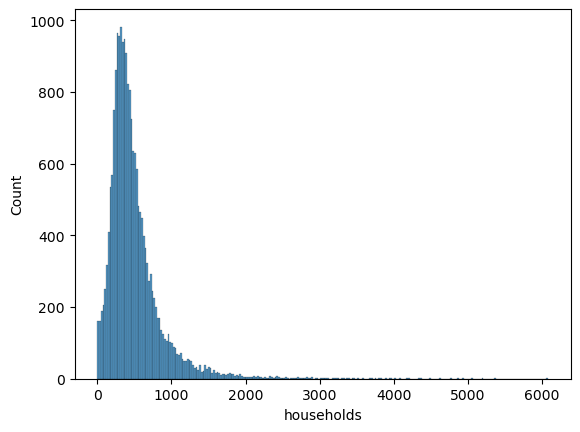

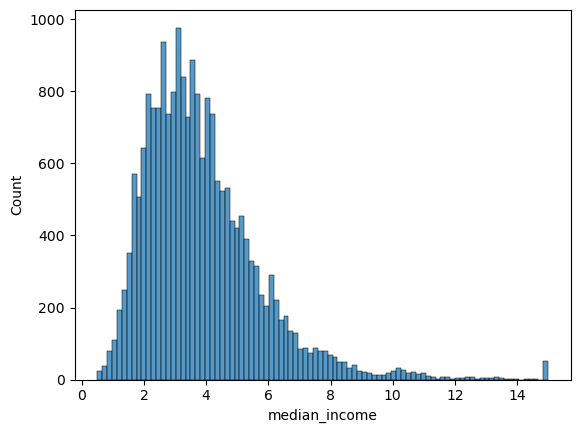

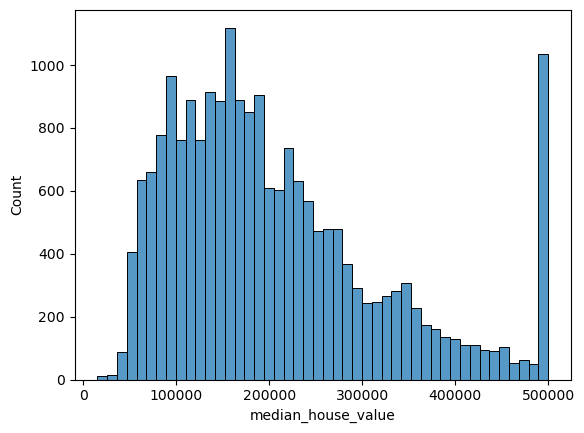

In [5]:
df_num = df_boston.select_dtypes(exclude = "object")
for i in df_num:
    sns.histplot(data = df_num, x=i)
    plt.show()


#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [10]:
df_boston.isna().mean()*100 # Dataset is clean, no missing values

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

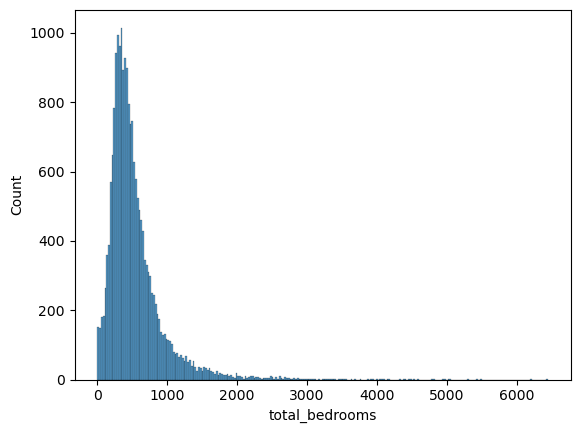

In [17]:
#Treating missing value, it is numerical column, replace missing value with medien, because the dat is slightly right skew
sns.histplot(df_boston["total_bedrooms"])
plt.show()
df_boston["total_bedrooms"].fillna(df_boston["total_bedrooms"].median(),inplace=True)

In [18]:
df_boston.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [24]:
df_boston["rooms_per_household"] = df_boston["total_rooms"] / df_boston["households"]
df_boston["population_per_household"]= df_boston["population"] / df_boston["households"]
df_boston["bedrooms_per_household"]= df_boston["total_bedrooms"] / df_boston["households"]

3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [42]:
x1 = df_boston["rooms_per_household"].nlargest(2).index
x2 = df_boston["rooms_per_household"].nsmallest(2).index 
df_boston.drop(index = x1+x2,inplace = True)


In [43]:
df_boston["rooms_per_household"].describe()


count    20638.000000
mean         5.429036
std          2.474280
min          0.846154
25%          4.440789
50%          5.229129
75%          6.052381
max        141.909091
Name: rooms_per_household, dtype: float64

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

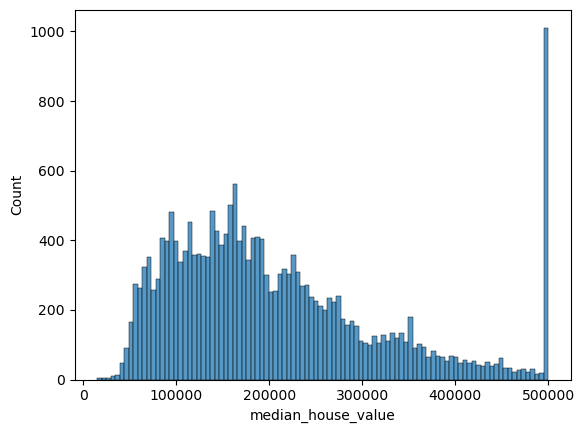

In [44]:
sns.histplot(data = df_boston, x = df_boston["median_house_value"], bins=100)
plt.show()

2. Check out what variables correlates the most with "median house value"

In [ ]:
# For numerical values:
# Assuming 'df_num' contains numerical columns, and 'median_house_value' is the target column
df_num = df_boston.select_dtypes(exclude=object)
correlations = df_num.corr()['median_house_value'].sort_values(ascending=False)
print(correlations)
# Plot the heatmap
#plt.figure(figsize=(6, 8))  # Optional: adjust the figure size as needed
#sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.title('Correlation of Features with MEDV')
#plt.show()

#mediean_income is correlated wiht target

median_house_value          1.000000
median_income               0.688071
rooms_per_household         0.151937
total_rooms                 0.134140
housing_median_age          0.105627
households                  0.065830
total_bedrooms              0.049444
population_per_household   -0.023736
population                 -0.024660
bedrooms_per_household     -0.045639
longitude                  -0.045962
latitude                   -0.144175
Name: median_house_value, dtype: float64


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

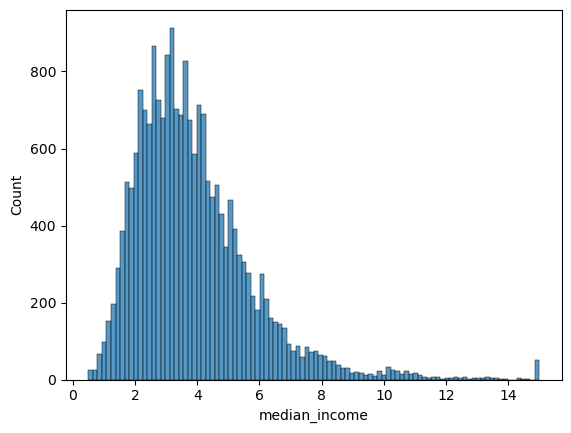

In [46]:
sns.histplot(data = df_boston, x="median_income",bins =100)
plt.show()




4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

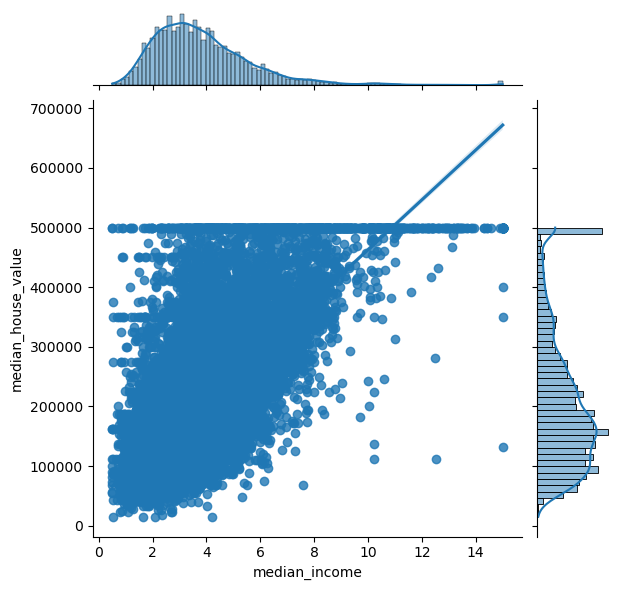

In [47]:
sns.jointplot(y = 'median_house_value',x = 'median_income',data = df_boston, kind="reg")
plt.show()

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

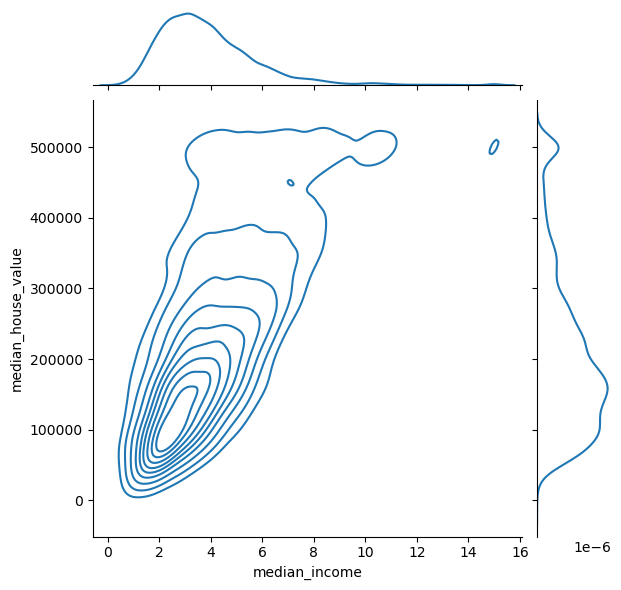

In [48]:
sns.jointplot(y = 'median_house_value',x = 'median_income',data = df_boston, kind="kde")
plt.show()

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [53]:
quantile_bins = [0, 0.25, 0.5, 0.75, 0.95, 1]
income_quantile = df_boston["median_income"].quantile(quantile_bins).values
labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]
df_boston["income_cat"] = pd.cut(df_boston["median_income"],bins = income_quantile,labels=labels,include_lowest=True)
df_boston

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_quantile,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,1.023810,Very High,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.971880,Very High,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,1.073446,High,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,1.073059,High,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,1.081081,Above_Average,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,1.133333,Low,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,1.315789,Low,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,1.120092,Low,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,1.171920,Low,Low


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

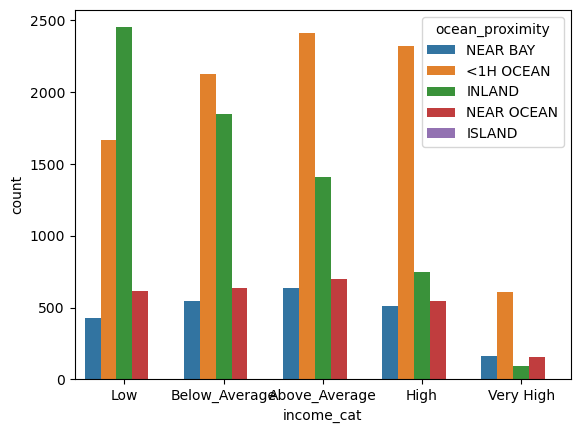

In [54]:
sns.countplot(data= df_boston, x=df_boston["income_cat"],hue="ocean_proximity")
plt.show()

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

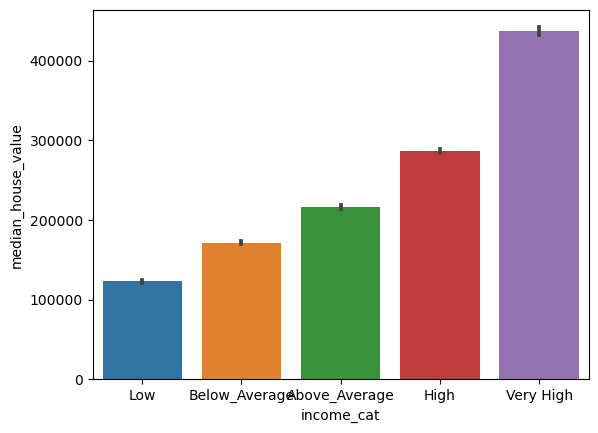

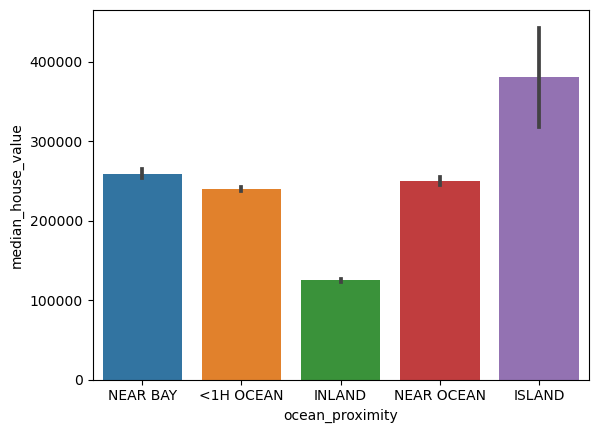

In [57]:
sns.barplot(data=df_boston,x='income_cat',y='median_house_value')
plt.show()

sns.barplot(data=df_boston,x='ocean_proximity',y='median_house_value')
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [66]:
pivot_table = pd.pivot_table(df_boston,index="income_cat",columns="ocean_proximity",values="median_house_value")
pivot_table.drop(columns=["ISLAND"],inplace=True)
pivot_table

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161308.037148,84769.142449,155709.169014,148132.739414
Below_Average,196926.469397,115214.944234,220160.244526,209471.397799
Above_Average,231996.086271,147710.575586,261706.026688,255610.000000
High,292113.906816,207970.902537,321968.963035,337934.853748
Very High,439648.851307,346034.531250,451015.078788,468739.723270


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

<Axes: xlabel='ocean_proximity', ylabel='income_cat'>

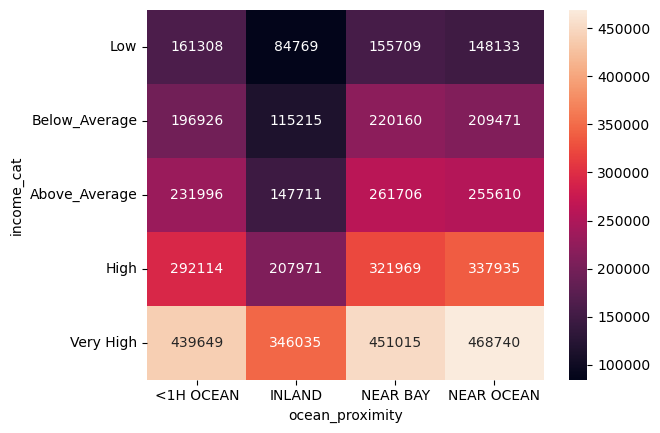

In [72]:
pivot_df = pivot_table.round(0).astype(int)
sns.heatmap(pivot_df,annot=True, fmt='d')

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [73]:
df_boston.drop(columns="income_cat",axis =1, inplace= True)

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [ ]:
import scipy.stats as stats
z_scored = df_boston.select_dtypes(include='float').apply(lambda x:stats.zscore(x))


3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [79]:
dummies = pd.get_dummies(df_boston.select_dtypes(include="object"),drop_first=True)

4. Save our predicting variable to `y`.

In [80]:
y= df_boston['median_house_value']

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [ ]:
z_scored.drop(columns='median_house_value',axis =1, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327735,1.052452,0.982316,-0.804843,-0.972507,-0.974439,-0.977055,2.344699,0.628518,-0.049593,-0.148530,False,False,True,False
1,-1.322743,1.043089,-0.606922,2.045776,1.357045,0.861361,1.669855,2.332171,0.327013,-0.092507,-0.248554,False,False,True,False
2,-1.332726,1.038407,1.856397,-0.535778,-0.827059,-0.820794,-0.843663,1.782650,1.155556,-0.025840,-0.052922,False,False,True,False
3,-1.337717,1.038407,1.856397,-0.624244,-0.719761,-0.766047,-0.733811,0.932946,0.156945,-0.050326,-0.053668,False,False,True,False
4,-1.337717,1.038407,1.856397,-0.462438,-0.612463,-0.759865,-0.629190,-0.012872,0.344681,-0.085611,-0.038217,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758737,1.801538,-0.289075,-0.445020,-0.388330,-0.512620,-0.443488,-1.216080,-0.155031,-0.049107,0.062429,True,False,False,False
20636,-0.818631,1.806220,-0.845308,-0.888725,-0.922434,-0.944417,-1.008441,-0.691561,0.276855,0.005022,0.413867,True,False,False,False
20637,-0.823623,1.778129,-0.924770,-0.175039,-0.123663,-0.369570,-0.174089,-1.142547,-0.090329,-0.071730,0.036925,True,False,False,False
20638,-0.873535,1.778129,-0.845308,-0.355638,-0.304877,-0.604454,-0.393793,-1.054540,-0.040224,-0.091220,0.136752,True,False,False,False


In [85]:
X = pd.concat([z_scored,dummies],axis = 1)
X.shape

(20638, 15)

In [86]:
y.shape

(20638,)

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [88]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model instance
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [95]:
print("y_Train: ",y_train.shape)
print("y_pred shape: ",y_pred.shape)


y_Train:  (16510,)
y_pred shape:  (4128,)


3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

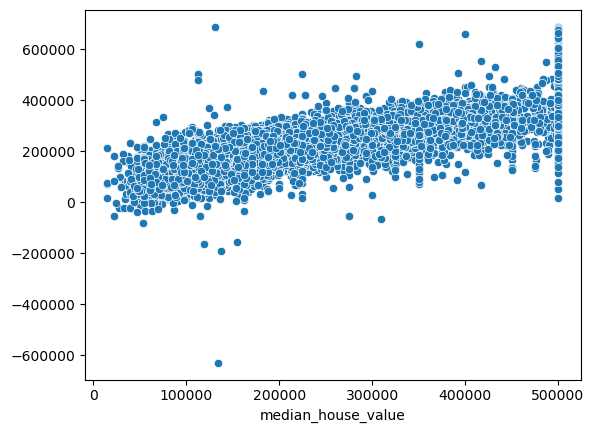

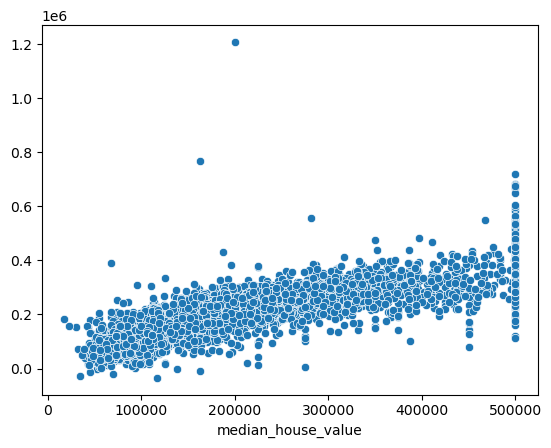

In [ ]:
sns.scatterplot(x=y_train,y=y_pred_train)
plt.show()



4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [99]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

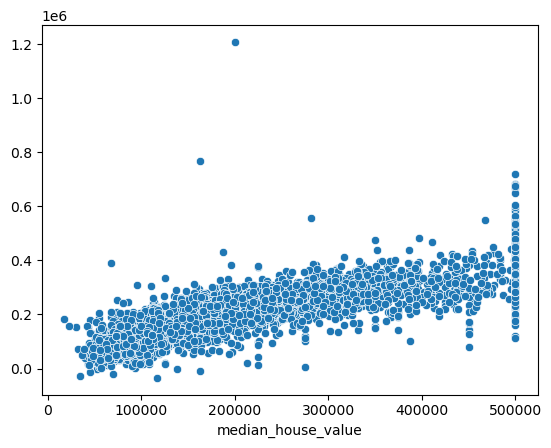

In [110]:
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")  # On average, the squared difference between the predicted and actual house prices is approximately 4.99 billion.

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}") #"The model explains 62.2% of the variance in house prices."

Mean Squared Error: 4991675163.791427
R-squared: 0.6221595080654916


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [108]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 70651.78811460773


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [109]:
df_comparison = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_comparison['y_pred'] = df_comparison['y_pred'].round(2)

# Display the DataFrame
print(df_comparison)

         y_test     y_pred
12414   68200.0  124126.56
3024    45800.0  132280.03
9548   113900.0  120339.67
16534  106300.0  122381.03
12593  101600.0  108430.48
...         ...        ...
5508   303900.0  264397.69
13508   72400.0   50734.45
2144    72300.0  121204.89
3665   151500.0  185418.46
14161  143800.0  185140.97

[4128 rows x 2 columns]


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [112]:
df_comparison['absolute_error'] = abs(df_comparison['y_test'] - df_comparison['y_pred'])

# Create a Series for absolute errors
absolute_errors = df_comparison['absolute_error']

# Display the absolute errors
print(absolute_errors)

12414    55926.56
3024     86480.03
9548      6439.67
16534    16081.03
12593     6830.48
           ...   
5508     39502.31
13508    21665.55
2144     48904.89
3665     33918.46
14161    41340.97
Name: absolute_error, Length: 4128, dtype: float64


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
y_pred_rf = rf.predict(X_test)

In [115]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}")  # On average, the squared difference between the predicted and actual house prices is approximately 4.99 billion.

r2_rf= r2_score(y_test, y_pred_rf)
print(f"R-squared: {r2_rf}") #"The model explains 62.2% of the variance in house prices."


rmse_rf = np.sqrt(mse_rf)
print(f"Root Mean Squared Error: {rmse_rf}")

Mean Squared Error: 2458456895.545864
R-squared: 0.8139092524387576
Root Mean Squared Error: 49582.828635989135


2. Make prediction on the test data and evaluate you results.

In [117]:
df_comparison_rf = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_rf})
df_comparison_rf['y_pred'] = df_comparison['y_pred'].round(2)

# Display the DataFrame
print(df_comparison_rf)

         y_test     y_pred
12414   68200.0  124126.56
3024    45800.0  132280.03
9548   113900.0  120339.67
16534  106300.0  122381.03
12593  101600.0  108430.48
...         ...        ...
5508   303900.0  264397.69
13508   72400.0   50734.45
2144    72300.0  121204.89
3665   151500.0  185418.46
14161  143800.0  185140.97

[4128 rows x 2 columns]
